# Making a Mean Refelection Map from Sentinel-1 image

Sentinel-1 is a radar satellite bearing a C-band Synthetic Aperture Radar (SAR) sensor. In this notebook, we take a subset of a Sentinel-1 image stack (in format of SLC, Single Look Complex) with ~80 aqcuisitions from 2014 to 2023, and create a mean reflection map by taking the temporal mean.

The data used in this notebook can be found [here](https://nlesc-my.sharepoint.com/:u:/g/personal/o_ku_esciencecenter_nl/EYKFwalO6wdCizSrpB9PpvIBqZBeusyZno_GyzKIrUvC5A?e=Cd23ye) (2.5GB, need to be unzipped).

In [ ]:
# One need to install `sarxarray` to run this notebook
# ! pip install sarxarray

In [ ]:
import xarray as xr
import sarxarray
import numpy as np
from pathlib import Path

In [ ]:
# Load data
slcs = xr.open_zarr('slc_img_stack.zarr')
slcs = slcs.slcstack._get_amplitude()
slcs

<xarray.Dataset> Size: 8GB
Dimensions:    (azimuth: 2000, range: 4000, time: 82)
Coordinates:
  * azimuth    (azimuth) int64 16kB 7000 7001 7002 7003 ... 8996 8997 8998 8999
  * range      (range) int64 32kB 31000 31001 31002 31003 ... 34997 34998 34999
  * time       (time) datetime64[ns] 656B 2014-12-19 2015-03-13 ... 2023-09-03
Data variables:
    complex    (azimuth, range, time) complex64 5GB dask.array<chunksize=(2000, 4000, 1), meta=np.ndarray>
    lat        (azimuth, range) float32 32MB dask.array<chunksize=(2000, 4000), meta=np.ndarray>
    lon        (azimuth, range) float32 32MB dask.array<chunksize=(2000, 4000), meta=np.ndarray>
    amplitude  (azimuth, range, time) float32 3GB dask.array<chunksize=(2000, 4000, 1), meta=np.ndarray>

In [ ]:
# Inspect time stamps
slcs['time']

<xarray.DataArray 'time' (time: 82)> Size: 656B
array(['2014-12-19T00:00:00.000000000', '2015-03-13T00:00:00.000000000',
       '2015-05-12T00:00:00.000000000', '2015-07-11T00:00:00.000000000',
       '2016-01-19T00:00:00.000000000', '2016-03-19T00:00:00.000000000',
       '2016-05-18T00:00:00.000000000', '2016-08-10T00:00:00.000000000',
       '2016-10-03T00:00:00.000000000', '2016-11-08T00:00:00.000000000',
       '2016-12-08T00:00:00.000000000', '2017-01-07T00:00:00.000000000',
       '2017-02-06T00:00:00.000000000', '2017-03-08T00:00:00.000000000',
       '2017-04-07T00:00:00.000000000', '2017-05-07T00:00:00.000000000',
       '2017-06-06T00:00:00.000000000', '2017-07-06T00:00:00.000000000',
       '2017-08-05T00:00:00.000000000', '2017-09-04T00:00:00.000000000',
       '2017-10-04T00:00:00.000000000', '2017-11-03T00:00:00.000000000',
       '2017-12-03T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2018-03-03T00:00:00.000000000',
       '2018-04-02T00:00:00.000000000', '2018-05-02T00:00:00.000000000',
       '2018-06-01T00:00:00.000000000', '2018-07-01T00:00:00.000000000',
       '2018-07-31T00:00:00.000000000', '2018-08-30T00:00:00.000000000',
       '2018-09-29T00:00:00.000000000', '2018-10-29T00:00:00.000000000',
       '2018-11-28T00:00:00.000000000', '2019-01-03T00:00:00.000000000',
       '2019-02-02T00:00:00.000000000', '2019-03-04T00:00:00.000000000',
       '2019-04-03T00:00:00.000000000', '2019-05-03T00:00:00.000000000',
       '2019-06-02T00:00:00.000000000', '2019-07-02T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-08-31T00:00:00.000000000',
       '2019-09-30T00:00:00.000000000', '2019-10-30T00:00:00.000000000',
       '2019-11-29T00:00:00.000000000', '2019-12-29T00:00:00.000000000',
       '2020-01-28T00:00:00.000000000', '2020-02-27T00:00:00.000000000',
       '2020-03-28T00:00:00.000000000', '2020-04-27T00:00:00.000000000',
       '2020-05-27T00:00:00.000000000', '2020-06-26T00:00:00.000000000',
       '2020-07-26T00:00:00.000000000', '2020-08-25T00:00:00.000000000',
       '2020-09-24T00:00:00.000000000', '2020-10-24T00:00:00.000000000',
       '2020-11-23T00:00:00.000000000', '2020-12-23T00:00:00.000000000',
       '2021-01-22T00:00:00.000000000', '2021-02-21T00:00:00.000000000',
       '2021-03-23T00:00:00.000000000', '2021-04-22T00:00:00.000000000',
       '2021-05-22T00:00:00.000000000', '2021-06-27T00:00:00.000000000',
       '2021-07-27T00:00:00.000000000', '2021-08-26T00:00:00.000000000',
       '2021-09-25T00:00:00.000000000', '2021-10-25T00:00:00.000000000',
       '2021-11-24T00:00:00.000000000', '2021-12-30T00:00:00.000000000',
       '2022-02-28T00:00:00.000000000', '2022-04-29T00:00:00.000000000',
       '2022-06-28T00:00:00.000000000', '2022-09-08T00:00:00.000000000',
       '2022-11-07T00:00:00.000000000', '2023-01-06T00:00:00.000000000',
       '2023-03-07T00:00:00.000000000', '2023-05-06T00:00:00.000000000',
       '2023-07-05T00:00:00.000000000', '2023-09-03T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 656B 2014-12-19 2015-03-13 ... 2023-09-03

In [ ]:
# Make mrm
# The `.slcstack` accessor can only be used when `sarxarray` is imported
mrm = slcs.slcstack.mrm().compute()

/home/oku/miniforge3/envs/pydepsi-dev/lib/python3.12/site-packages/sarxarray/stack.py:34: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  t_order = list(self._obj.dims.keys()).index("time")  # Time dimension order


(np.float64(34999.5),
 np.float64(30999.5),
 np.float64(8999.5),
 np.float64(6999.5))

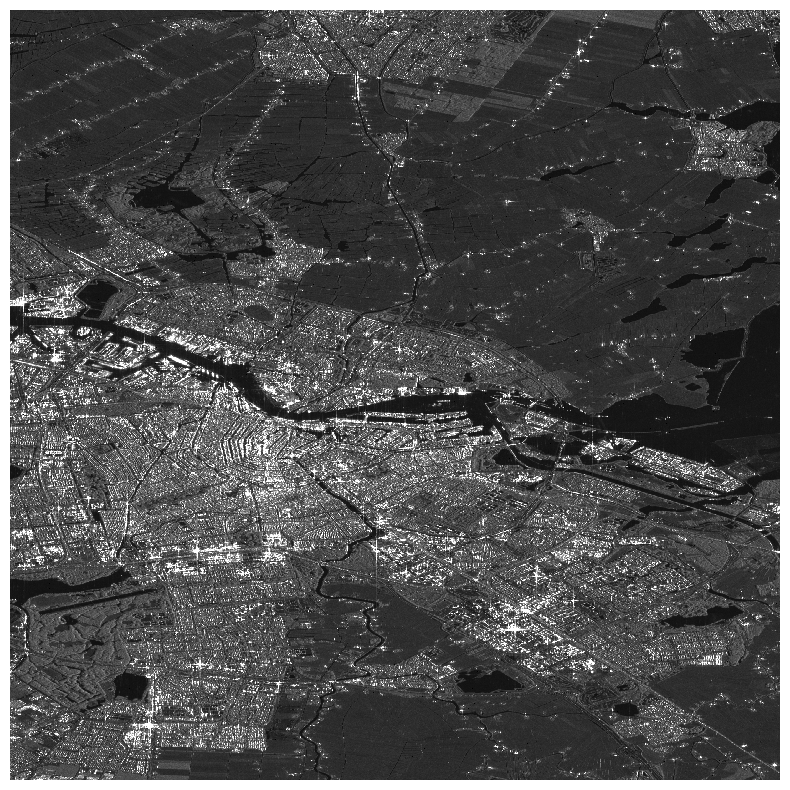

In [5]:
# Visualize
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches((10,10))
im = mrm.plot(ax=ax, robust=True, cmap='gray', add_colorbar=False, xincrease=False, yincrease=False)
ax.set_aspect(2)
im.set_clim([0, 300])
ax.axis('off')